<a href="https://colab.research.google.com/github/lanzetti1/Univesp/blob/main/S05_Pratica_Histograma_Limiariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue >Prática - Histogramas e Limiarização </font>

## Roteiro
Esta atividade explicará como gerar histogramas de uma imagem e utilizá-los para diversas aplicações, incluindo a segmentação de imagens.

## Tópicos
1. Leitura e escrita de imagem pelo *Jupyter* em *python*
2. Criação de histograma de uma imagem
3. Identificação dos elementos importantes do histograma: vales, picos e plateaus.
4. Cálculo de limiares
5. Limiar de *Otsu*
6. Aprimoramentos de limiares
7. Limiares não locais

# 1. Bibliotecas
Vamos usar as bibliotecas opencv2 e matplotlib.<br>
Os comandos abaixo carregam as bibliotecas e renomeiam elas.<br>
Renomear facilita a utilização das mesmas.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# 2. Abrindo uma imagem
Primeiro passo, vamos ler uma imagem a partir da pasta onde seu notebook está.<br>
A imagem abaixo é pública e foi retirada da base mirflickr08.<br>
Depois de abrir a imagem, vamos imprimir suas dimensões.<br>
Note que o OpenCV utiliza os eixos x e y invertidos.<br>
Assim, as dimensões são dadas em y,x,c, em que c é a quantidade de canais de cores.<br>
O parâmetro 1 depois do nome da imagem é para indicar que estamos lendo imagem colorida.<br>
Podemos alterar para 0, para abrir a imagem em tons de cinza ou para -1 para adicionar o canal de transparência.


In [ ]:
!pip install wget # instalar o pacote wget
import wget
url = 'https://www.dropbox.com/s/ta5fst2mxca85qm/lion.jpg?dl=1'
wget.download(url,out = "./")
img = cv.imread("lion.jpg",1)
print(img.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(335, 500, 3)


# 3. Visualizando uma imagem
## a) Imagem pelo OpenCV
Agora vamos visualizar a imagem. Para isso, vamos utilizar o comando imshow.
<br>

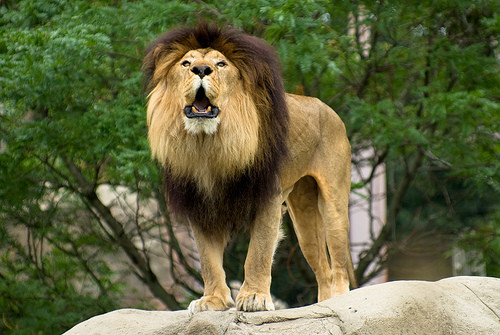

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

## b) Imagem pelo matplotlib
Outra alternativa para visualizar a imagem no próprio notebook é usar o matplotlib.<br>
Mas ele utiliza outra ordem dos canais de cor.<br>
O OpenCV utiliza os canais na ordem BGR, e o matplotlib, RGB.<br>
Podemos converter a imagem para o formato RGB com o comando cvtColor, conforme abaixo.<br>
Se quisermos só visualizar sem usar o OpenCV, podemos abrir a imagem diretamente pelo matplotlib.


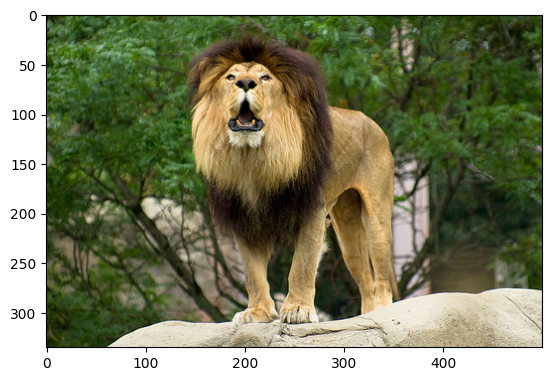

In [ ]:
RGBimg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGBimg)

## c) Imagem em tons de cinza
Agora vamos abrir a imagem em tons de cinza para realizar um processamento.<br>
Podemos visualizar também as dimensões e a imagem resultante pelo opencv e pelo matplotlib.<br>
O parâmetro adicional da função de visualização do matplotlib é para ele reconhecer que a imagem é cinza.

(335, 500)


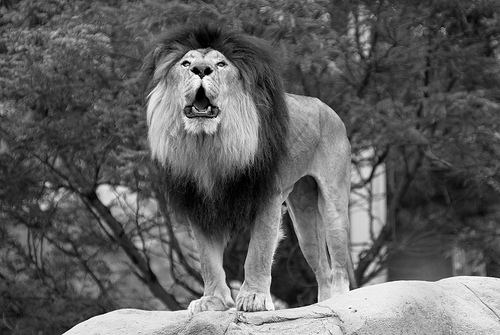

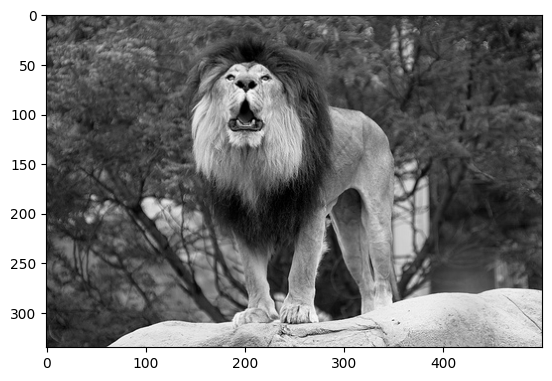

In [ ]:
grayimg = cv.imread('lion.jpg', 0)
print(grayimg.shape)
plt.imshow(grayimg, cmap='gray')
cv2_imshow(grayimg)

# 4. Criação de Histograma
## a) Tons de cinza
Podemos usar os comandos abaixo para criar e imprimir um histograma pelo OpenCV.<br>
Os parâmetros devem estar entre colchetes, com exceção do terceiro que no caso é um valor vazio.<br>
Primeiro parâmetro: imagem de onde se calcula o histograma.<br>
Segundo parâmetro: canal de cor (0 para imagem cinza, e de 0 a 2 para imagens coloridas.<br>
Terceiro parâmetro: Uma imagem máscara ou vazio (None). Se for uma imagem máscara, deve vir entre colchetes.<br>
Quarto parâmetro: Quantidade de barras do histograma.<br>
Quinto parâmetro: Faixa dos valores do histograma.

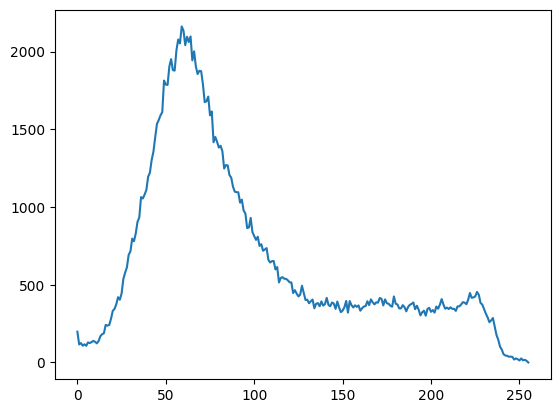

In [ ]:
grayhist = cv.calcHist([grayimg], [0], None, [256], [0, 255])
plt.plot(grayhist)

## b) Imagem colorida
Para uma imagem colorida, podemos seguir o mesmo procedimento, variando os parâmetros.<br>
Vamos apenas imprimir todas as cores juntas em um mesmo gráfico. <br>
O comando xlim corta os valores do eixo X antes e depois dos limites dados como parâmetros. <br>
O comando show pode ser necessário no Jupyter, caso o comando plot não exiba o gráfico automaticamente. <br>
Pelo resultado, conseguimos ver as cores mais predominantes que são as com picos maiores com valores de intensidade maiores.

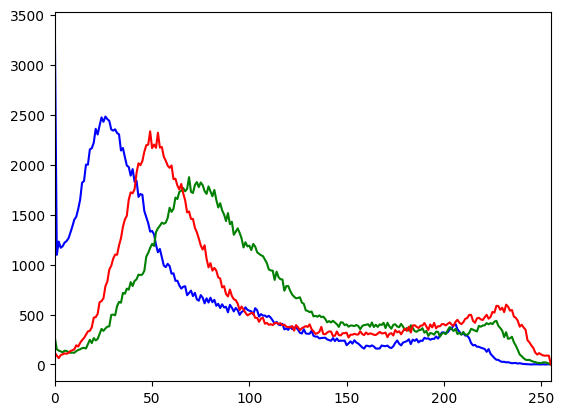

In [ ]:
color = ('b', 'g', 'r')
for i,clr in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 255])
    plt.plot(hist, color = clr)
    plt.xlim([0,255])
#plt.show()

# 5. Equalização
A equalização do histograma de uma imagem é usada para distribuir mais homogeneamente as intensidades de brilho ou cores de uma imagem em todo o espectro.<br>
O OpenCV possui um comando para a equalização, conforme abaixo.

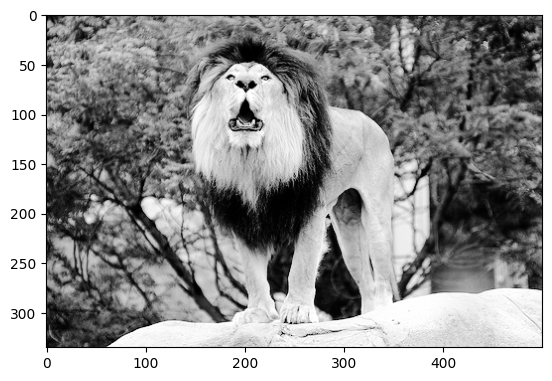

In [ ]:
eqgrayimg = cv.equalizeHist(grayimg)
plt.imshow(eqgrayimg, cmap='gray')

Podemos imprimir o histograma equalizado para verificar a distribuição mais homogênea.<br>
Neste caso, tivemos como efeito colateral a atribuição do valor 0 para algumas barras.

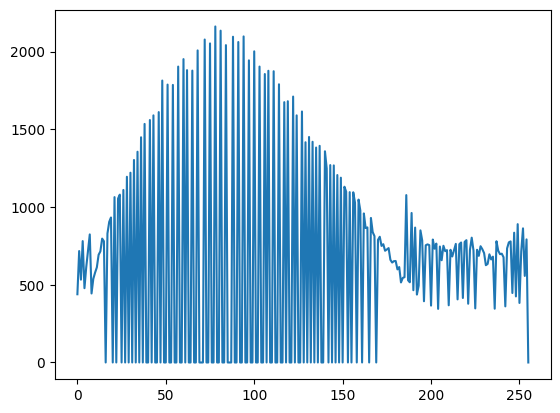

In [ ]:
eqgrayhist = cv.calcHist([eqgrayimg], [0], None, [256], [0, 255])
plt.plot(eqgrayhist)

# 6. Picos e Vales
Podemos calcular também os picos e vales de um histograma, que são seus pontos de maior e menor frequência, respectivamente.<br>
Eles podem trazer informações relevantes para descrevermos a imagem e também podemm ser úteis para a segmentação, como veremos em aulas futuras.

In [ ]:
peak_bin = 0
peak_value = grayhist[0]
valley_bin = 0
valley_value = grayhist[0]
for bin in range(256):
    if peak_value < grayhist[bin]:
        peak_value = grayhist[bin]
        peak_bin = bin
    if valley_value > grayhist[bin] and grayhist[bin] != 0:
        valley_value = grayhist[bin]
        valley_bin = bin
print("Pico em ", peak_bin, " com o valor ", peak_value)
print("Vale em ", valley_bin, " com o valor ", valley_value)

Pico em  59  com o valor  [2162.]
Vale em  254  com o valor  [11.]


# 7. Limiarização
A limiarização consiste em encontrar um valor de barra de histograma para dividi-lo ao meio, resultando em uma segmentação da imagem, em que os valores acima ou abaixo do limiar representam uma região de interesse. <br>
No exemplo abaixo, usamos o pico do histograma para realizar a limiarização <br>
O comando *figure* permite criar figuras em uma matriz para exibição simultânea. Para esse comando, passamos como parâmetro a largura e a altura de cada figura. <br>
Depois, precisamos indicar onde será adicionada cada figura, dados o número de linas, de colunas e a posição global na matriz da nova figura a ser adicionada. <br>
Por fim, ao utilizarmos o comando *imshow*, a imagem é automaticamente adicionada na posição desejada.

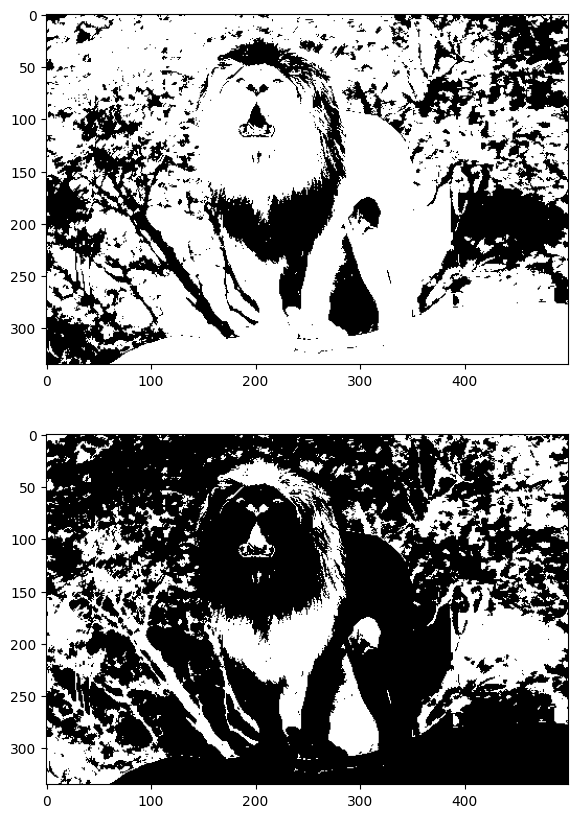

In [ ]:
ret, thres1 = cv.threshold(grayimg, peak_bin, 255, cv.THRESH_BINARY)
ret, thres2 = cv.threshold(grayimg, peak_bin, 255, cv.THRESH_BINARY_INV)
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 1, 1)
plt.imshow(thres1, cmap='gray')
fig.add_subplot(2, 1, 2)
plt.imshow(thres2, cmap='gray')

# 8. Limiar de *Otsu*
O limiar de *Otsu*, conhecido pelo nome do pesquisador que o propôs, calcula o melhor limiar para segmentar a imagem em duas partes, de modo que a soma das variâncias dentro de cada classe seja a menor possível.<br>
Esse método pode ser aplicado a apenas um canal de cor ou à imagem de tons de cinza.
### Função objetivo
$min~\sigma^2_\omega(t) = \omega_0(t)\sigma^2_0(t)+\omega_1(t)\sigma^2_1(t)$,<br>

em que $\omega_0$ e $\omega_1$ são as progabilidades de duas classes separadas por um limiar $t$; e $\sigma^2_0$ e $\sigma^2_1$ são as variâncias das duas classes.<br>
### Probabilidades
As probabilidades das classes são calculadas por:<br>

$w_0(t)=\sum_{i=0}^{t-1} p(i)$<br>
$w_1(t)=\sum_{i=t}^{L-1} p(i)$<br>

em que $L$ é o número de barras do histograma iniciado com valor 0 e p(i) é a probabilidade do valor de intensidade $p(i)$ ocorrer.<br>
$p(i)$ pode ser calculado para todas as barras $i$ por dividir o valor do histograma pelo total número de pixels da imagem.

### Aplicação
No OpenCV, usamos a mesma função *threshold*, mas com a *flag* THRESHOLD_OTSU.

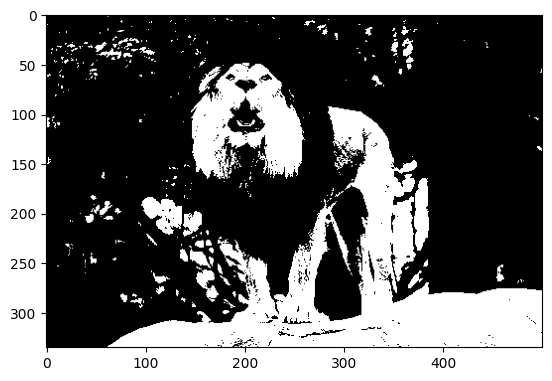

In [ ]:
ret, thres3 = cv.threshold(grayimg, 0, 255, cv.THRESH_OTSU)
plt.imshow(thres3, cmap='gray')